In [45]:

import numpy as np
import torch
import math
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [46]:

X = torch.rand((1000, 1))
Y= torch.sin(5*math.pi*X)/(5*math.pi*X)

Y1 = torch.cos(X)

In [47]:
def calcParams(inputModel):
    val = sum(params.numel() for params in inputModel.parameters() if params.requires_grad)
    return val

In [48]:

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val


class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 20)
        self.fc3 = nn.Linear(20, 10)
        self.fc4 = nn.Linear(10, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val 

class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 30)
        self.fc2 = nn.Linear(30, 16)
        self.fc3 = nn.Linear(16, 10)
        self.fc4 = nn.Linear(10, 8)        
        self.fc5 = nn.Linear(8, 4)
        self.fc6 = nn.Linear(4, 1)        
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val


In [49]:
# Set up necessary auxilaries for neural net training for simulation of both functions
model1 = Model1()
model2 = Model2()
model3 = Model3()
model4 = Model1()
model5=Model2()
model6=Model3()
costFunc = nn.MSELoss()
model1_Opt = optim.Adam(model1.parameters(), lr=0.001)
model2_Opt = optim.Adam(model2.parameters(), lr=0.001)
model3_Opt = optim.Adam(model3.parameters(),lr = 0.001)
model4_Opt = optim.Adam(model4.parameters(), lr=0.001)
model5_Opt = optim.Adam(model5.parameters(), lr=0.001)
model6_Opt = optim.Adam(model6.parameters(),lr = 0.001)

In [50]:
# Train neural networks and track progression on function cos(x)
EPOCHS = 1000
model1_cost = []
for index in range(EPOCHS):
    model1.zero_grad()
    output = model1(X)
    cost = costFunc(output, Y)
    model1_cost.append(cost.detach().numpy())
    cost.backward()
    model1_Opt.step()


model2_cost = []

for index in range(EPOCHS):
    model2.zero_grad()
    output = model2(X)
    cost = costFunc(output, Y)
    model2_cost.append(cost.detach().numpy())
    cost.backward()
    model2_Opt.step()


model3_cost = []

for index in range(EPOCHS):
    model3.zero_grad()
    output = model3(X)
    cost = costFunc(output, Y)
    model3_cost.append(cost.detach().numpy())
    cost.backward()
    model3_Opt.step()


In [51]:
EPOCHS = 1000
model4_cost = []
for index in range(EPOCHS):
    model4.zero_grad()
    output = model4(X)
    cost = costFunc(output, Y1)
    model4_cost.append(cost.detach().numpy())
    cost.backward()
    model4_Opt.step()


model5_cost = []

for index in range(EPOCHS):
    model5.zero_grad()
    output = model5(X)
    cost = costFunc(output, Y1)
    model5_cost.append(cost.detach().numpy())
    cost.backward()
    model5_Opt.step()


model6_cost = []

for index in range(EPOCHS):
    model6.zero_grad()
    output = model6(X)
    cost = costFunc(output, Y1)
    model6_cost.append(cost.detach().numpy())
    cost.backward()
    model6_Opt.step()


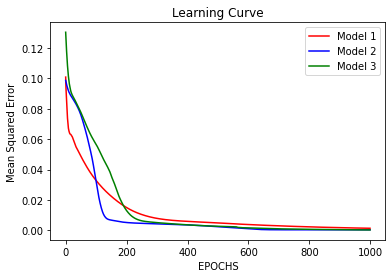

In [52]:
# Visulaize Training process of cos function

plt.plot(range(EPOCHS), model1_cost, 'r', label='Model 1')
plt.plot(range(EPOCHS), model2_cost, 'b', label='Model 2')
plt.plot(range(EPOCHS), model3_cost, 'g', label='Model 3')
plt.title("Learning Curve")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

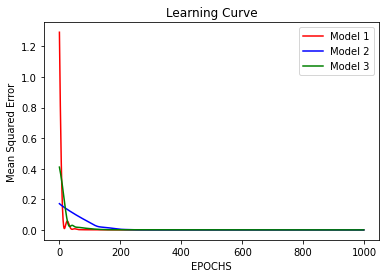

In [56]:

plt.plot(range(EPOCHS), model4_cost, 'r', label='Model 1')
plt.plot(range(EPOCHS), model5_cost, 'b', label='Model 2')
plt.plot(range(EPOCHS), model6_cost, 'g', label='Model 3')
plt.title("Learning Curve")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

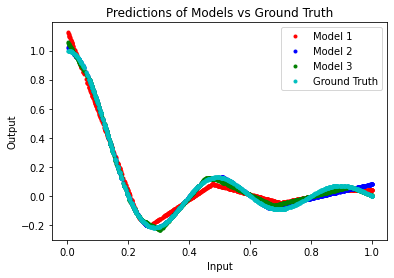

In [54]:

model1_pred = model1(X)
model2_pred = model2(X)
model3_pred = model3(X)

plt.plot(X.tolist(), model1_pred.tolist(), 'r.', label='Model 1')
plt.plot(X.tolist(), model2_pred.tolist(), 'b.', label='Model 2')
plt.plot(X.tolist(), model3_pred.tolist(), 'g.', label='Model 3')
plt.plot(X, Y.tolist(), 'c.', label='Ground Truth')
plt.title("Predictions of Models vs Ground Truth")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc="upper right")
plt.show()


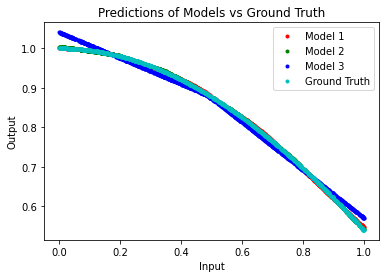

In [55]:

model4_pred = model4(X)
model5_pred = model5(X)
model6_pred = model6(X)

plt.plot(X.tolist(), model4_pred.tolist(), 'r.', label='Model 1')
plt.plot(X.tolist(), model5_pred.tolist(), 'g.', label='Model 2')
plt.plot(X.tolist(), model6_pred.tolist(), 'b.', label='Model 3')
plt.plot(X, Y1.tolist(), 'c.', label='Ground Truth')
plt.title("Predictions of Models vs Ground Truth")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc="upper right")
plt.show()
